In [1]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
url = 'http://www2.stetson.edu/~jrasp/data/KyDerby.xls'
df = pd.read_excel(url)
df['Time'] = df.Mins*60+df.Secs
df = df.set_index('Year')
df.head()

,Winner,Mins,Secs,Time
Year,,,,
1875,Aristides,2,37.75,157.75
1876,Vagrant,2,38.25,158.25
1877,Baden-Baden,2,38.00,158.00
1878,Day Star,2,37.25,157.25
1879,Lord Murphy,2,27.00,147.00


In [3]:
triplecrownyears = [1919, 1930, 1935, 1937, 1941, 1943,
                   1946, 1948, 1973, 1977, 1978]
df['Crown'] = df.index.isin(triplecrownyears)
crown = df.query('Crown == True')

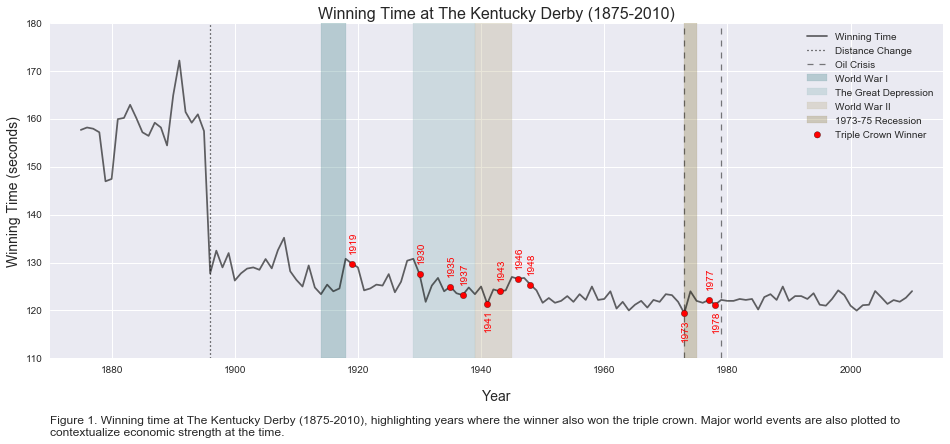

In [4]:
x = seaborn.diverging_palette(200, 70, n=6)

fig, (ax) = pl.subplots(nrows = 1, ncols = 1, figsize = (16,6))
ax.plot(df.index, df.Time, c = 'k', alpha = 0.6, zorder = 2, 
        label = "Winning Time")
ax.scatter(crown.index, crown.Time, c = 'r', alpha = 1, s = 40, zorder = 3, 
           label = 'Triple Crown Winner')
for row in crown.itertuples():
    if row.Index in [1941, 1973, 1978]:
        pl.text(row.Index - 0.5, row.Time - 2.5, row.Index,
                color = 'r', rotation = 90)
    else:
        pl.text(row.Index - 0.5, row.Time + 5.5, row.Index,
                color = 'r', rotation = 90)
        pass
    pass

pl.plot((1896, 1896), (100, 200), c = 'k', linestyle = 'dotted', 
        linewidth = '1.25', zorder = 1, label = 'Distance Change')
pl.plot((1973, 1973), (100, 200), c = 'k', alpha = 0.5, zorder = 1, 
        linestyle = 'dashed', linewidth = '1.25', label = 'Oil Crisis')
pl.plot((1979, 1979), (100, 200), c = 'k', alpha = 0.5, zorder = 1, 
        linestyle = 'dashed', linewidth = '1.25')
pl.axvspan(1914, 1918, color = x[0], alpha = 0.3, zorder = 1, label = 'World War I')
pl.axvspan(1929, 1939, color = x[1], alpha = 0.3, zorder = 1, label = 'The Great Depression')
pl.axvspan(1939, 1945, color = x[4], alpha = 0.3, zorder = 1, label = 'World War II')
pl.axvspan(1973, 1975, color = x[5], alpha = 0.3, zorder = 1, label = '1973-75 Recession')

ax.axis([1870, 2015, 110, 180])
ax.set_xlabel('Year', fontsize = 14, labelpad = 15)
ax.set_ylabel('Winning Time (seconds)', fontsize = 14)
ax.set_title('Winning Time at The Kentucky Derby (1875-2010)', fontsize = 16)
ax.text(1870, 94, "Figure 1. Winning time at The Kentucky Derby (1875-2010), \
highlighting years where the winner also won the triple crown. Major world events \
are also plotted to \ncontextualize economic strength at the time.", fontsize = 12)
ax.legend()